In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

## GRADER PLEASE NOTE

* Some of the instructions are different from the original but still adhere to the rubric.
* The students get the average precipitation per day instead of every single precipitation value.

In [9]:
#usa = session.query(BaseballPlayer).\
#    filter(BaseballPlayer.birth_country == 'USA').count()
#print(f"There are {usa} players from the USA")

In [10]:
session.query(Measurement).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f977cab7580>,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1}

In [11]:
# Find the most recent date in the data set.
session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()

('2017-08-23')

In [12]:
# Using this date, find the average precipitation per day
# for the preceding 12 months of data sorted by ascending date.
s = session.query(Measurement.date,func.avg(Measurement.prcp)).\
    order_by(Measurement.date.desc()).group_by(Measurement.date).limit(365).all()

In [41]:
df = pd.DataFrame(s, columns = ['date', 'prcp'])

In [42]:
len(s)

365

In [43]:
df.head()

,date,prcp
0,2017-08-23,0.132500
1,2017-08-22,0.166667
2,2017-08-21,0.193333
3,2017-08-20,0.005000
4,2017-08-19,0.030000


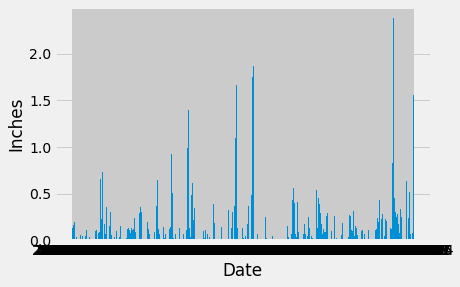

In [44]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(df['date'], df['prcp'])
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [18]:
session.query(Station).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f977d5135b0>,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'longitude': -157.8168,
 'latitude': 21.2716}

In [19]:
# Query total number of stations in dataset
session.query(Station).count()

9

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
high_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).limit(1).all()

high_station

[('USC00519281', 2772)]

In [29]:
# Using the station id from the previous query, calculate the lowest, 
# highest, and average temperature recorded for this station.
avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == high_station[0][0]).all()
high = session.query(func.max(Measurement.tobs)).filter(Measurement.station == high_station[0][0]).all()
low = session.query(func.min(Measurement.tobs)).filter(Measurement.station == high_station[0][0]).all()


print(avg)
print(high)
print(low)

[(71.66378066378067,)]
[(85.0,)]
[(54.0,)]


In [47]:
d = session.query(Measurement.date ,Measurement.tobs).filter(Measurement.station == high_station[0][0]).\
order_by(Measurement.date.desc()).limit(365).all()

df = pd.DataFrame(d, columns = ['date', 'tobs'])

df.head()

,date,tobs
0,2017-08-18,79.0
1,2017-08-17,76.0
2,2017-08-16,76.0
3,2017-08-15,77.0
4,2017-08-14,77.0


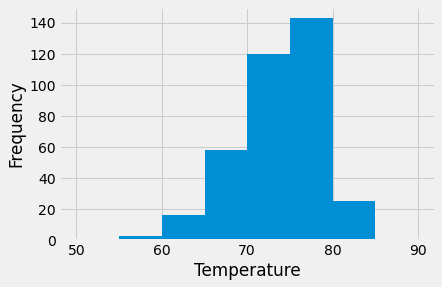

In [48]:
# Query the last 12 months of temperature observation data for this station.
# Plot the results as a histogram with bins = 12.
bins = [50,55,60,65,70,75, 80, 85, 90]

plt.hist(df['tobs'], bins=bins)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show()

# Close session

In [49]:
session.close()